In [1]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras import utils # utils.to_categorical
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# 로지스틱회귀분석(이진분류)
## 1. 데이터셋 생성 & 전처리

In [43]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.values[:2]
# 결측치 없으므로, csv파일을 바로 넘파이 배열로 읽어올 예정

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ,   0.   ]])

In [44]:
# np.set_printoptions(threshold=sys.maxsize)

In [45]:
# 1. 임신횟수
# 2. 2시간내 포도당 농도
# 3. 혈압
# 4. 피부접힘 두께
# 5. 인슐린수치
# 6. BMI체질량지수
# 7. 가족력
# 8. 나이
# 9. 당뇨병발병여부

In [46]:
# csv파일을 numpy 배열로 읽어오기 np.loadtxt() np.genfromtxt() #이 있는 행은 제외하여 읽어옴
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
dataset.shape

(768, 9)

In [47]:
# 학습데이터셋(학습용 데이터) : 모델 학습시 사용
X_train = dataset[:700, :-1]
y_train = dataset[:700, -1]
# 테스트데이터셋(시험용 데이터) : 모델 평가시 사용
X_test = dataset[700:, :-1]
y_test = dataset[700:,-1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

## 2. 모델 구성

In [63]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 12)                108       
                                                                 
 dense_29 (Dense)            (None, 8)                 104       
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [64]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

## 4. 학습

In [65]:
hist = model.fit(X_train, y_train, # 훈련데이터
                 epochs=200,
                 # batch_size=350,
                 # validation_split=0.2 # 검증 데이터 비율(훈련데이터셋 중 20%를 검증용 데이터로)
                 verbose=0
                )

## 5. 모델 평가하기(학습과정보기, 평가)

In [66]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

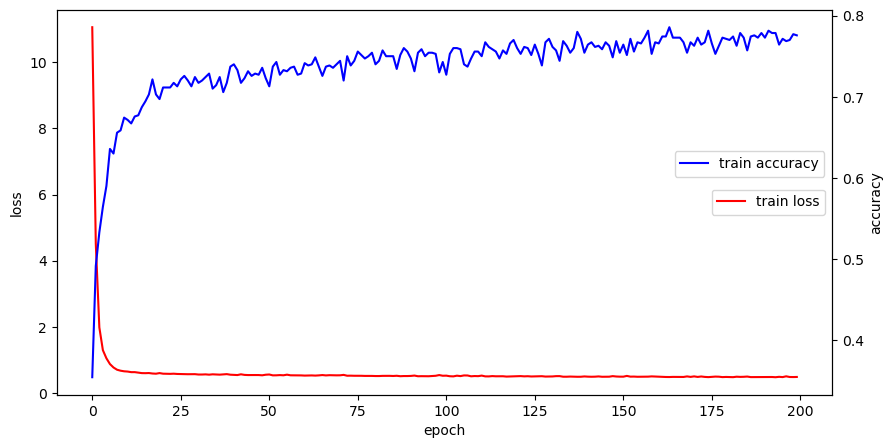

In [67]:
# 학습과정 표시하기(validation dataset 없는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'b', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.65))
plt.show()

In [68]:
# 모델 평가(X)
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 1ms/step - loss: 0.5074 - binary_accuracy: 0.7600


[0.507379949092865, 0.7599999904632568]

In [70]:
# 모델 평가(o)
score = model.evaluate(X_test, y_test)
print("loss : {}, 정확도 : {}%".format(score[0], score[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.6407 - binary_accuracy: 0.6912
loss : 0.6407266855239868, 정확도 : 69.11764740943909%


## 6. 모델 사용하기

In [80]:
X_train[10], y_train[10]

(array([  4.   , 110.   ,  92.   ,   0.   ,   0.   ,  37.6  ,   0.191,
         30.   ]),
 0.0)

In [74]:
model.predict([[6, 148, 62, 35, 0, 33.6, 0.627, 50]])

1/1 [==============================] - 0s 51ms/step


array([[0.92922807]], dtype=float32)

In [82]:
(model.predict([[4, 110, 92, 0, 0, 37.6, 0.191, 30],
                [6, 148, 62, 35, 0, 33.6, 0.627, 50]]) > 0.5).astype(int)

1/1 [==============================] - 0s 50ms/step


array([[0],
       [1]])

## 7. 교차표
- 테스트 데이터셋의 실제값(y_test)과 예측값

In [85]:
y_hat = (model.predict(X_test)>0.5).astype(float)
cnt1=0; cnt2=0; cnt3=0; cnt4=0
# y_hat.shape, y_test.shape
for h, y in zip(y_hat.reshape(-1), y_test.reshape(-1)):
    if h==1.0 and y==1.0:
        cnt1+=1
    elif y==1.0 and h==0.0:
        cnt2 += 1
    elif y==0.0 and h==1.0:
        cnt3 += 1
    else:
        cnt4 += 1
print(cnt1, cnt2)
print(cnt3, cnt4)

3/3 [==============================] - 0s 2ms/step
21 6
15 26


In [89]:
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

예측값,0.0,1.0
실제값,,
0.0,26,15
1.0,6,21


# 분류분석
```
1. 데이터셋 생성 및 전처리 : 훈련셋600, 검증셋100, 테스트셋68으로 분리, 종속변수의 원핫인코딩
2. 모델생성(input 8, target 2) : 출력층에서의 활성화함수 'softmax'
    * model.summary()에서 파라미터 수 확인
3. 모델학습과정 설정 (loss='categorical_crossentropy' metrics=['accuracy']
4. 모델 학습 : validation_data=[X_val, y_val] 추가해서 학습
5. 모델 학습 평가 : 그래프(hist.history.keys()를 확인후 4가지)
                  평가(X_test, Y_test)
                  교차표(pd.crosstab 이용)
6. 모델 사용하기 - 예측
                 0        1
                 0.9912   0.00124
```

In [135]:
# csv파일을 numpy 배열로 읽어오기 np.loadtxt() np.genfromtxt() #이 있는 행은 제외하여 읽어옴
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
dataset.shape

(768, 9)

In [136]:
#1. 데이터셋 생성 및 전처리 : 훈련셋600, 검증셋100, 테스트셋68으로 분리, 종속변수의 원핫인코딩

# 학습데이터셋(학습용 데이터)
X_train = dataset[:600, :-1]
Y_train = dataset[:600, -1]
Y_train = utils.to_categorical(Y_train,2)
# 검증데이터셋
X_val = dataset[600:700, :-1]
Y_val = dataset[600:700,-1]
Y_val = utils.to_categorical(Y_val,2)
# 테스트데이터셋(테스트 데이터)
X_test = dataset[700:, :-1]
Y_test = dataset[700:, -1]
Y_test = utils.to_categorical(Y_test,2)

In [137]:
# 2. 모델생성(input 8, target 2) : 출력층에서의 활성화함수 'softmax'
#     * model.summary()에서 파라미터 수 확인
model = Sequential()
model.add(Input(shape=8,))
model.add(Dense(units=12, activation='elu'))
model.add(Dense(units=8, activation='elu'))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 12)                108       
                                                                 
 dense_41 (Dense)            (None, 8)                 104       
                                                                 
 dense_42 (Dense)            (None, 2)                 18        
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


In [138]:
# 3. 모델학습과정 설정 (loss='categorical_crossentropy' metrics=['accuracy']
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [139]:
# 4. 모델 학습 : validation_data=[X_val, Y_val] 추가해서 학습
hist = model.fit(X_train, Y_train,
                 epochs=200,
                 verbose=2,
                 validation_data=[X_val, Y_val]
                )

Epoch 1/200
19/19 - 1s - loss: 6.9003 - accuracy: 0.3517 - val_loss: 5.1682 - val_accuracy: 0.3300 - 728ms/epoch - 38ms/step
Epoch 2/200
19/19 - 0s - loss: 3.5369 - accuracy: 0.3967 - val_loss: 2.4116 - val_accuracy: 0.4300 - 68ms/epoch - 4ms/step
Epoch 3/200
19/19 - 0s - loss: 1.7017 - accuracy: 0.6017 - val_loss: 1.5269 - val_accuracy: 0.5900 - 60ms/epoch - 3ms/step
Epoch 4/200
19/19 - 0s - loss: 1.2803 - accuracy: 0.6467 - val_loss: 1.2088 - val_accuracy: 0.6100 - 57ms/epoch - 3ms/step
Epoch 5/200
19/19 - 0s - loss: 1.0318 - accuracy: 0.6383 - val_loss: 0.9910 - val_accuracy: 0.6000 - 76ms/epoch - 4ms/step
Epoch 6/200
19/19 - 0s - loss: 0.8375 - accuracy: 0.6650 - val_loss: 0.7271 - val_accuracy: 0.6100 - 103ms/epoch - 5ms/step
Epoch 7/200
19/19 - 0s - loss: 0.7200 - accuracy: 0.6633 - val_loss: 0.6804 - val_accuracy: 0.6500 - 66ms/epoch - 3ms/step
Epoch 8/200
19/19 - 0s - loss: 0.6707 - accuracy: 0.6850 - val_loss: 0.6722 - val_accuracy: 0.6500 - 62ms/epoch - 3ms/step
Epoch 9/200
1

Epoch 68/200
19/19 - 0s - loss: 0.4937 - accuracy: 0.7617 - val_loss: 0.4966 - val_accuracy: 0.7300 - 60ms/epoch - 3ms/step
Epoch 69/200
19/19 - 0s - loss: 0.4917 - accuracy: 0.7567 - val_loss: 0.4951 - val_accuracy: 0.7600 - 65ms/epoch - 3ms/step
Epoch 70/200
19/19 - 0s - loss: 0.4970 - accuracy: 0.7650 - val_loss: 0.4993 - val_accuracy: 0.7600 - 63ms/epoch - 3ms/step
Epoch 71/200
19/19 - 0s - loss: 0.4982 - accuracy: 0.7733 - val_loss: 0.5002 - val_accuracy: 0.7400 - 63ms/epoch - 3ms/step
Epoch 72/200
19/19 - 0s - loss: 0.4922 - accuracy: 0.7733 - val_loss: 0.4923 - val_accuracy: 0.7500 - 62ms/epoch - 3ms/step
Epoch 73/200
19/19 - 0s - loss: 0.4898 - accuracy: 0.7683 - val_loss: 0.4927 - val_accuracy: 0.7700 - 62ms/epoch - 3ms/step
Epoch 74/200
19/19 - 0s - loss: 0.4887 - accuracy: 0.7767 - val_loss: 0.4957 - val_accuracy: 0.7200 - 62ms/epoch - 3ms/step
Epoch 75/200
19/19 - 0s - loss: 0.4879 - accuracy: 0.7667 - val_loss: 0.4920 - val_accuracy: 0.7700 - 65ms/epoch - 3ms/step
Epoch 76

Epoch 134/200
19/19 - 0s - loss: 0.4859 - accuracy: 0.7617 - val_loss: 0.4937 - val_accuracy: 0.7900 - 61ms/epoch - 3ms/step
Epoch 135/200
19/19 - 0s - loss: 0.4678 - accuracy: 0.7700 - val_loss: 0.4786 - val_accuracy: 0.7700 - 64ms/epoch - 3ms/step
Epoch 136/200
19/19 - 0s - loss: 0.4679 - accuracy: 0.7817 - val_loss: 0.4921 - val_accuracy: 0.7600 - 62ms/epoch - 3ms/step
Epoch 137/200
19/19 - 0s - loss: 0.4637 - accuracy: 0.7667 - val_loss: 0.4806 - val_accuracy: 0.7800 - 58ms/epoch - 3ms/step
Epoch 138/200
19/19 - 0s - loss: 0.4631 - accuracy: 0.7750 - val_loss: 0.4895 - val_accuracy: 0.7700 - 57ms/epoch - 3ms/step
Epoch 139/200
19/19 - 0s - loss: 0.4659 - accuracy: 0.7717 - val_loss: 0.4832 - val_accuracy: 0.7700 - 54ms/epoch - 3ms/step
Epoch 140/200
19/19 - 0s - loss: 0.4662 - accuracy: 0.7883 - val_loss: 0.4990 - val_accuracy: 0.7500 - 56ms/epoch - 3ms/step
Epoch 141/200
19/19 - 0s - loss: 0.4690 - accuracy: 0.7750 - val_loss: 0.5022 - val_accuracy: 0.7400 - 58ms/epoch - 3ms/step


Epoch 200/200
19/19 - 0s - loss: 0.4463 - accuracy: 0.7883 - val_loss: 0.5066 - val_accuracy: 0.7600 - 59ms/epoch - 3ms/step


In [140]:
# 5. 모델 학습 평가 : 그래프(hist.history.keys()를 확인후 4가지)
#                   평가(X_test, Y_test)
#                   교차표(pd.crosstab 이용)
print(hist.history.keys())
score = model.evaluate(X_test, Y_test)
print('loss : {}, 정확도 ; {}%'.format(score[0], score[1]*100))
Y_hat = model.predict(X_test).argmax(axis=1)
ctab = pd.crosstab(Y_test.argmax(axis=1), Y_hat)
ctab.index.name='실제값'
ctab.columns.name = '예측값'
ctab

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
3/3 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7647
loss : 0.6375336647033691, 정확도 ; 76.47058963775635%
3/3 [==============================] - 0s 3ms/step


예측값,0,1
실제값,,
0,37,4
1,12,15


In [146]:
# 6. 모델 사용하기 - 예측
#                  0        1
#                  0.9912   0.00124
model.predict(X_test[0])

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_14/dense_40/Elu' defined at (most recent call last):
    File "C:\Users\4545\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\4545\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\4545\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\4545\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\4545\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\4545\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\4545\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\4545\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\4545\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\4545\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\4545\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\4545\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\4545\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\4545\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\4545\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\4545\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\4545\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\4545\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\4545\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\4545\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\4545\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\4545\AppData\Local\Temp\ipykernel_12972\980769373.py", line 4, in <module>
      model.predict(X_test[0])
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\activations.py", line 148, in elu
      return backend.elu(x, alpha)
    File "C:\Users\4545\anaconda3\lib\site-packages\keras\backend.py", line 5392, in elu
      res = tf.nn.elu(x)
Node: 'sequential_14/dense_40/Elu'
In[0] and In[1] has different ndims: [8] vs. [8,12]
	 [[{{node sequential_14/dense_40/Elu}}]] [Op:__inference_predict_function_287903]

In [143]:
X_test[0]

array([  2.   , 122.   ,  76.   ,  27.   , 200.   ,  35.9  ,   0.483,
        26.   ])